# Plot Time vs E, T, PE

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

M2-H2O-O2/moveon20ps   -38665.540 eV
M3-O2/moveon20ps       -38665.595 eV
M4/moveon20ps          -38665.828 eV
M5/moveon20ps          -38665.052 eV
M5x/moveon20ps         -38665.579 eV
M6/moveon20ps          -38666.563 eV


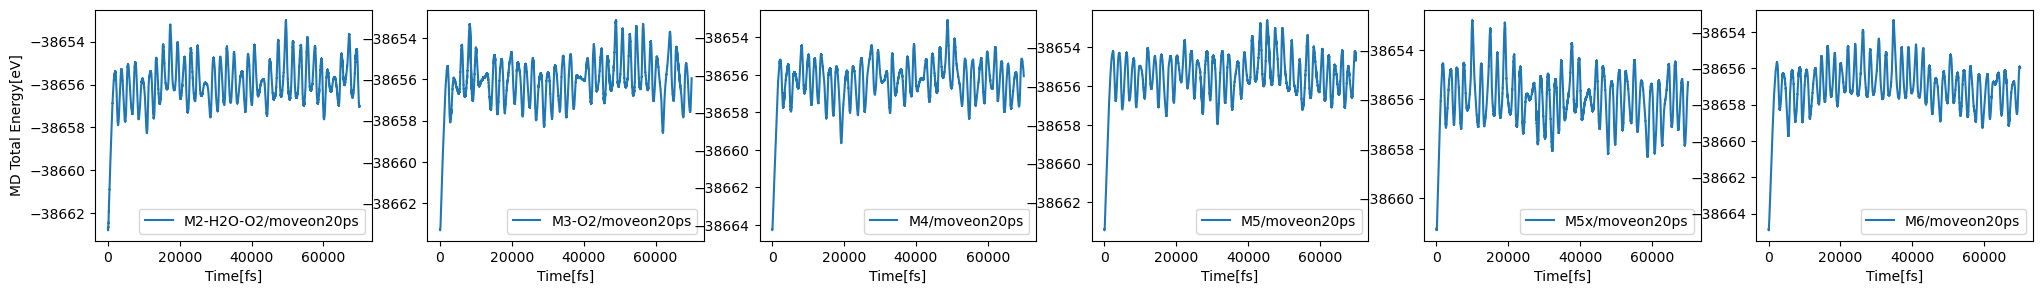

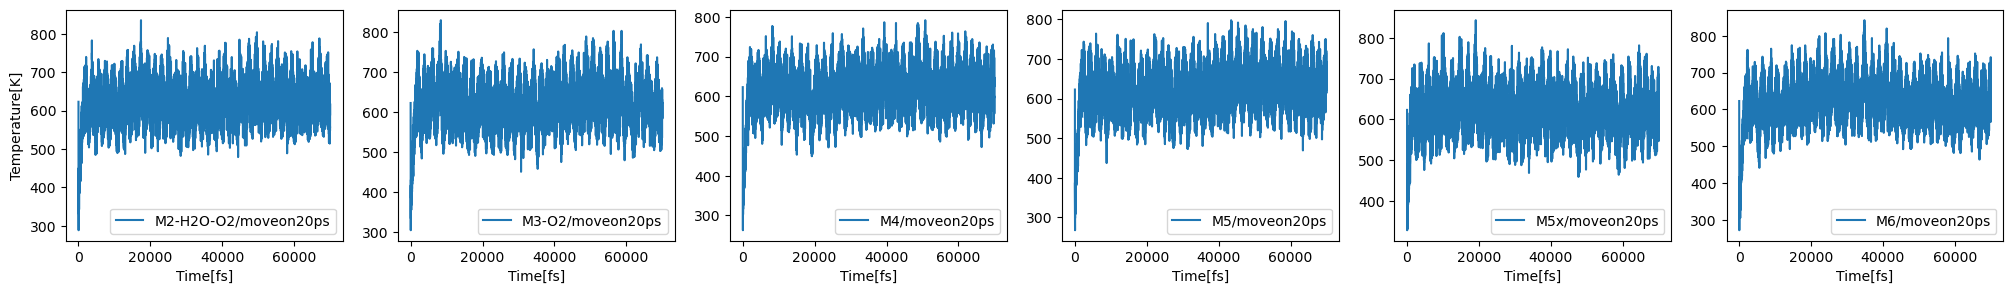

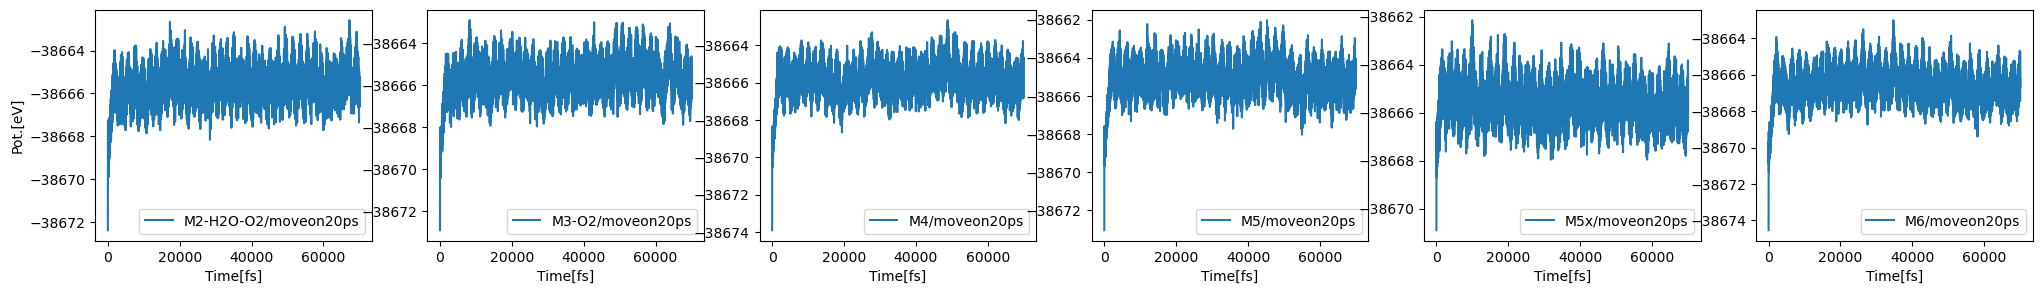

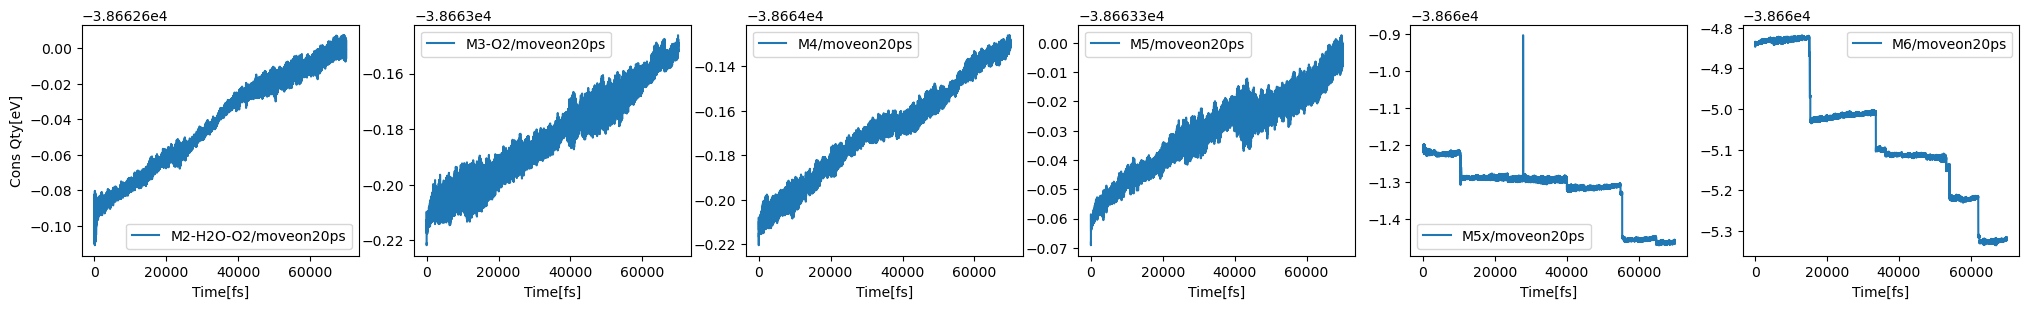

In [9]:
working_paths = ["/media/luping/work/CH4/equilibrium/monomer/M2-H2O-O2/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M3-O2/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M4/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M5/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M5x/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M6/moveon20ps"]

# working_paths = ["/media/luping/work/CH4/equilibrium/dimer/D1/moveon20ps",
#                  "/media/luping/work/CH4/equilibrium/dimer/D2/moveon20ps",
#                  "/media/luping/work/CH4/equilibrium/dimer/D3/moveon20ps"]

fig1 = plt.figure(figsize=(25, 3))
fig2 = plt.figure(figsize=(25, 3))
fig3 = plt.figure(figsize=(25, 3))
fig4 = plt.figure(figsize=(25, 3))

hartree2eV = 27.21139664
timestep = 0.5
enfile = "cp2k-1.ener"
# outfile = "cp2k.inp.out"
# tempfile = "temp" # temperature from cp2k.inp.out

for i, working_path in enumerate(working_paths):
    os.chdir(working_path)
    
    ener = pd.read_csv(enfile, sep='\s+', header=0, index_col=False,
            names=['Step Nr.', 'Time[fs]', 'Kin.[a.u.]', 'Temp[K]', 'Pot.[a.u.]', 'Cons Qty[a.u.]', 'UsedTime[s]'])
    
    # com = 'grep "MD| Temperature" ' + outfile + ' > ' + tempfile
    # os.system(com)
    # temp = pd.read_csv(tempfile, header=None, sep='\s+')
    # temp.drop([0,1,2], axis=1, inplace=True)
    # temp.columns = ["InstantT", "AverageT"]
    # temp.index = temp.index + 1
    
    myhead, mytail = os.path.split(working_path)
    mylabel = os.path.join(os.path.basename(myhead), mytail)
    
    ax1 = fig1.add_subplot(1, 6, i+1, xlabel="Time[fs]")
    _ = ax1.plot(ener.loc[:, "Time[fs]"],
                 (ener.loc[:, "Kin.[a.u.]"] + ener.loc[:, "Pot.[a.u.]"]) * hartree2eV,
                 label=mylabel)
    _ = ax1.legend(loc='lower right')
    
#     ax2 = fig2.add_subplot(1, 6, i+1, xlabel="Time[fs]")
#     _ = ax2.plot(temp.index * timestep, temp.loc[:, "InstantT"], label=os.path.basename(working_path))
#     _ = ax2.legend(loc='lower right')
    
    ax2 = fig2.add_subplot(1, 6, i+1, xlabel="Time[fs]")
    _ = ax2.plot(ener.loc[:, "Time[fs]"], ener.loc[:, "Temp[K]"], label=mylabel)
    _ = ax2.legend(loc='lower right')
    
    ax3 = fig3.add_subplot(1, 6, i+1, xlabel="Time[fs]")
    _ = ax3.plot(ener.loc[:, "Time[fs]"], ener.loc[:, "Pot.[a.u.]"] * hartree2eV, label=mylabel)
    _ = ax3.legend(loc='lower right')
    
    ax4 = fig4.add_subplot(1, 6, i+1, xlabel="Time[fs]")
    _ = ax4.plot(ener.loc[:, "Time[fs]"], ener.loc[:, "Cons Qty[a.u.]"] * hartree2eV, label=mylabel)
    _ = ax4.legend()
    
    if i+1 == 1:
        ax1.set_ylabel("MD Total Energy[eV]")
        ax2.set_ylabel("Temperature[K]")
        ax3.set_ylabel("Pot.[eV]")
        ax4.set_ylabel("Cons Qty[eV]")
        
        
    # get rid of the first 5 ps, do average
    pe_avg = ener.loc[10000:, "Pot.[a.u.]"].mean() * hartree2eV
    print("{:22s} {:.3f} eV".format(mylabel, pe_avg))

# Compute average PE of each structure

In [73]:
working_paths = ["/media/luping/work/CH4/equilibrium/monomer/M2-H2O-O2/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M3-O2/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M4/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M5/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M5x/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M6/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/dimer/D1/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/dimer/D2/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/dimer/D3/moveon20ps"]

hartree2eV = 27.21139664
timestep = 0.5
enfile = "cp2k-1.ener"

areas = {
    0: np.array([[5, 70]]),                         # M2
    1: np.array([[10, 50], [55, 70]]),              # M3
    2: np.array([[5, 30], [34, 47],
                 [50, 70]]),                        # M4
    3: np.array([[5, 45], [55, 70]]),               # M5
    4: np.array([[1.5, 6], [10, 37], [38.5, 40], 
                 [41, 44.5], [45, 70]]),            # M5x
    5: np.array([[5, 70]]),                         # M6
    6: np.array([[10, 70]]),                        # D1
    7: np.array([[5, 23], [27, 70]]),               # D2
    8: np.array([[10, 70]])                         # D3
}

for i, working_path in enumerate(working_paths):
    os.chdir(working_path)
    
    ener = pd.read_csv(enfile, sep='\s+', header=0, index_col=False,
            names=['Step Nr.', 'Time[fs]', 'Kin.[a.u.]', 'Temp[K]', 'Pot.[a.u.]', 'Cons Qty[a.u.]', 'UsedTime[s]'])
    
    myhead, mytail = os.path.split(working_path)
    mylabel = os.path.join(os.path.basename(myhead), mytail)
    
    area = areas[i]
    print(mylabel)
    
    for time in area:
        start, end = time * 2000
        pe_avg = ener.loc[start:end, "Pot.[a.u.]"].mean() * hartree2eV
        print("[{:4s}ps, {:4s}ps] {:.3f} eV \n".format(str(time[0]), str(time[1]), pe_avg))



M2-H2O-O2/moveon20ps
[5   ps, 70  ps] -38665.540 eV 

M3-O2/moveon20ps
[10  ps, 50  ps] -38665.645 eV 

[55  ps, 70  ps] -38665.565 eV 

M4/moveon20ps
[5   ps, 30  ps] -38665.873 eV 

[34  ps, 47  ps] -38665.749 eV 

[50  ps, 70  ps] -38665.869 eV 

M5/moveon20ps
[5   ps, 45  ps] -38664.971 eV 

[55  ps, 70  ps] -38665.325 eV 

M5x/moveon20ps
[1.5 ps, 6.0 ps] -38665.150 eV 

[10.0ps, 37.0ps] -38665.571 eV 

[38.5ps, 40.0ps] -38665.278 eV 

[41.0ps, 44.5ps] -38665.552 eV 

[45.0ps, 70.0ps] -38665.689 eV 

M6/moveon20ps
[5   ps, 70  ps] -38666.563 eV 

D1/moveon20ps
[10  ps, 70  ps] -39253.325 eV 

D2/moveon20ps
[5   ps, 23  ps] -39253.149 eV 

[27  ps, 70  ps] -39252.945 eV 

D3/moveon20ps
[10  ps, 70  ps] -39252.476 eV 



# Plot Time vs PE
**rolling window average**

## Monomer

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

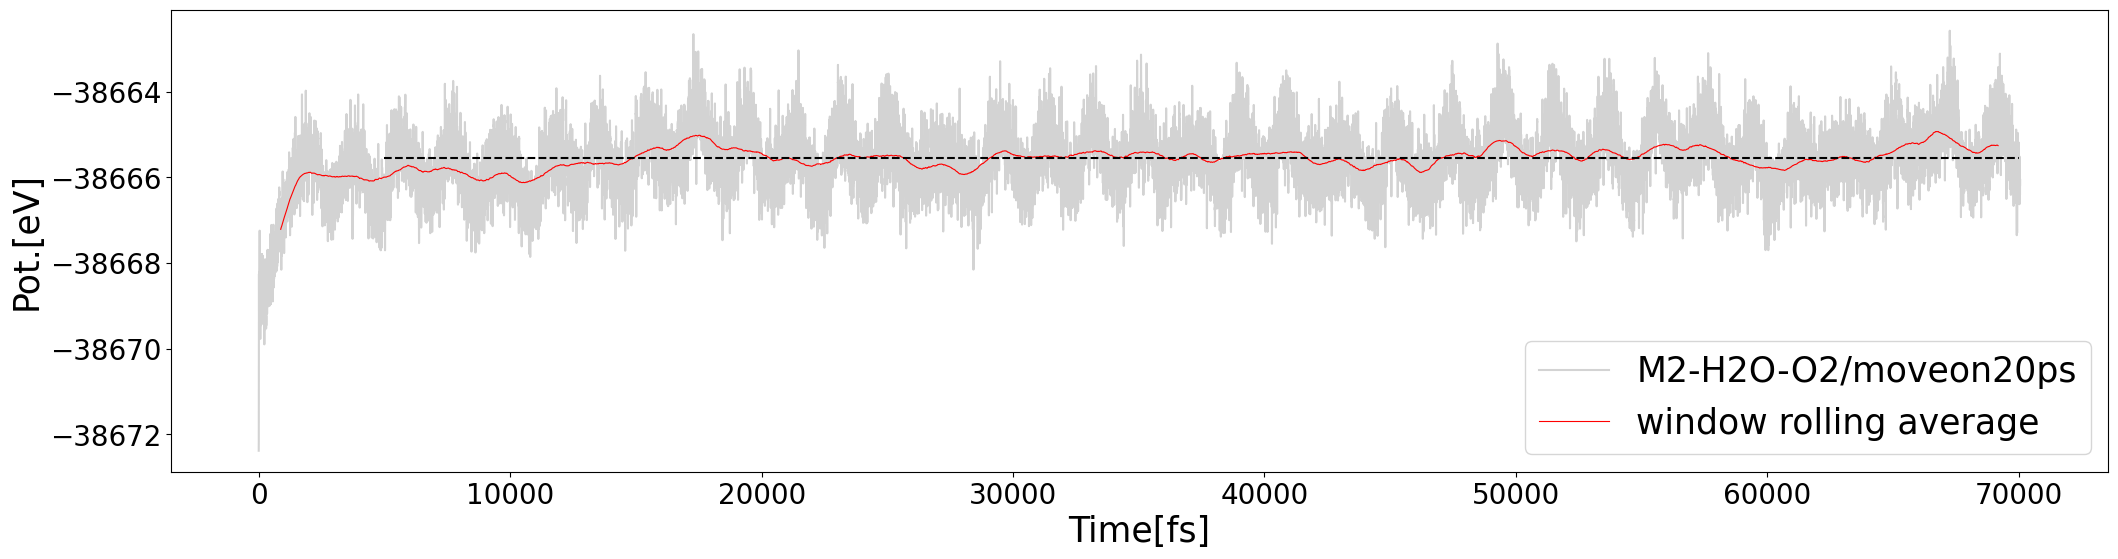

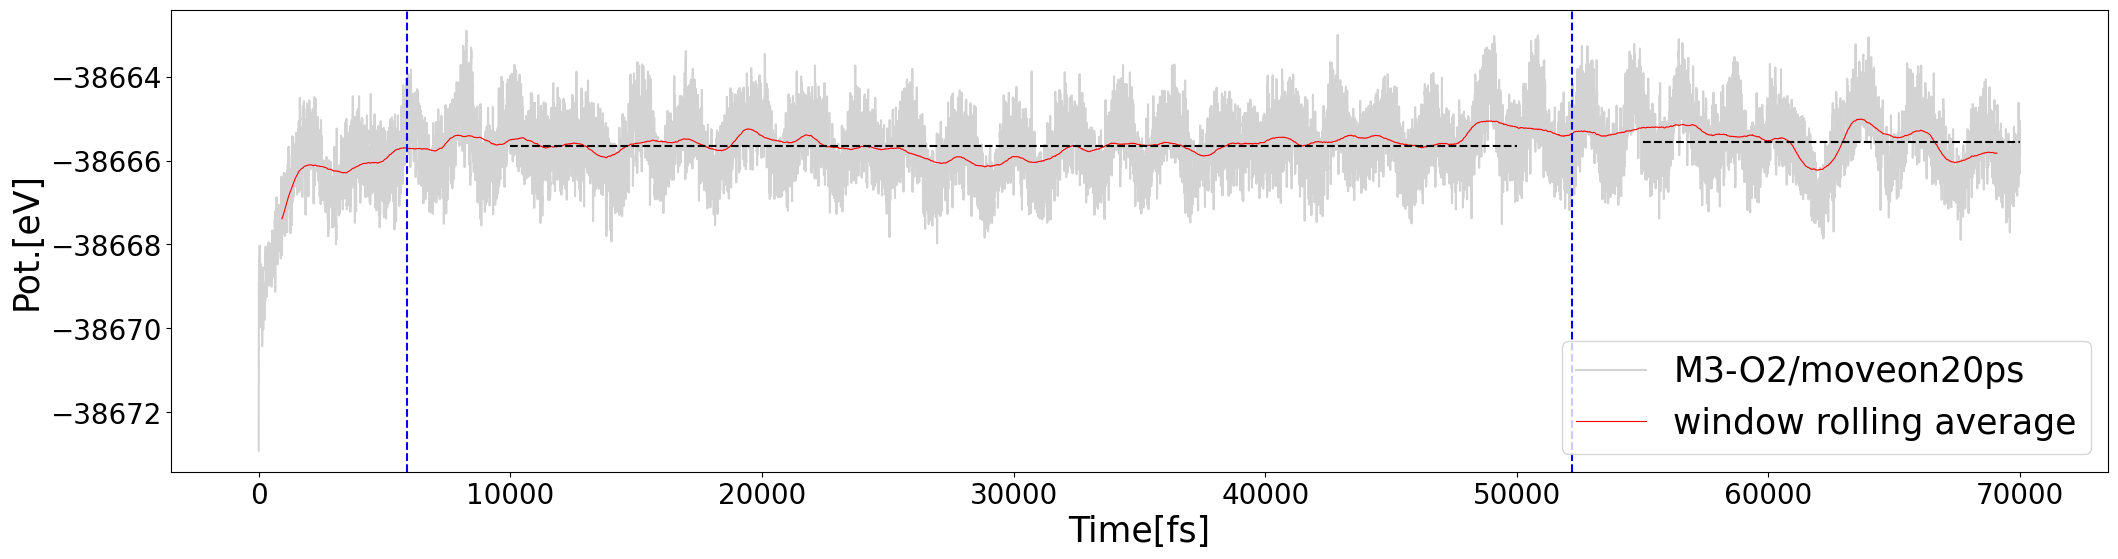

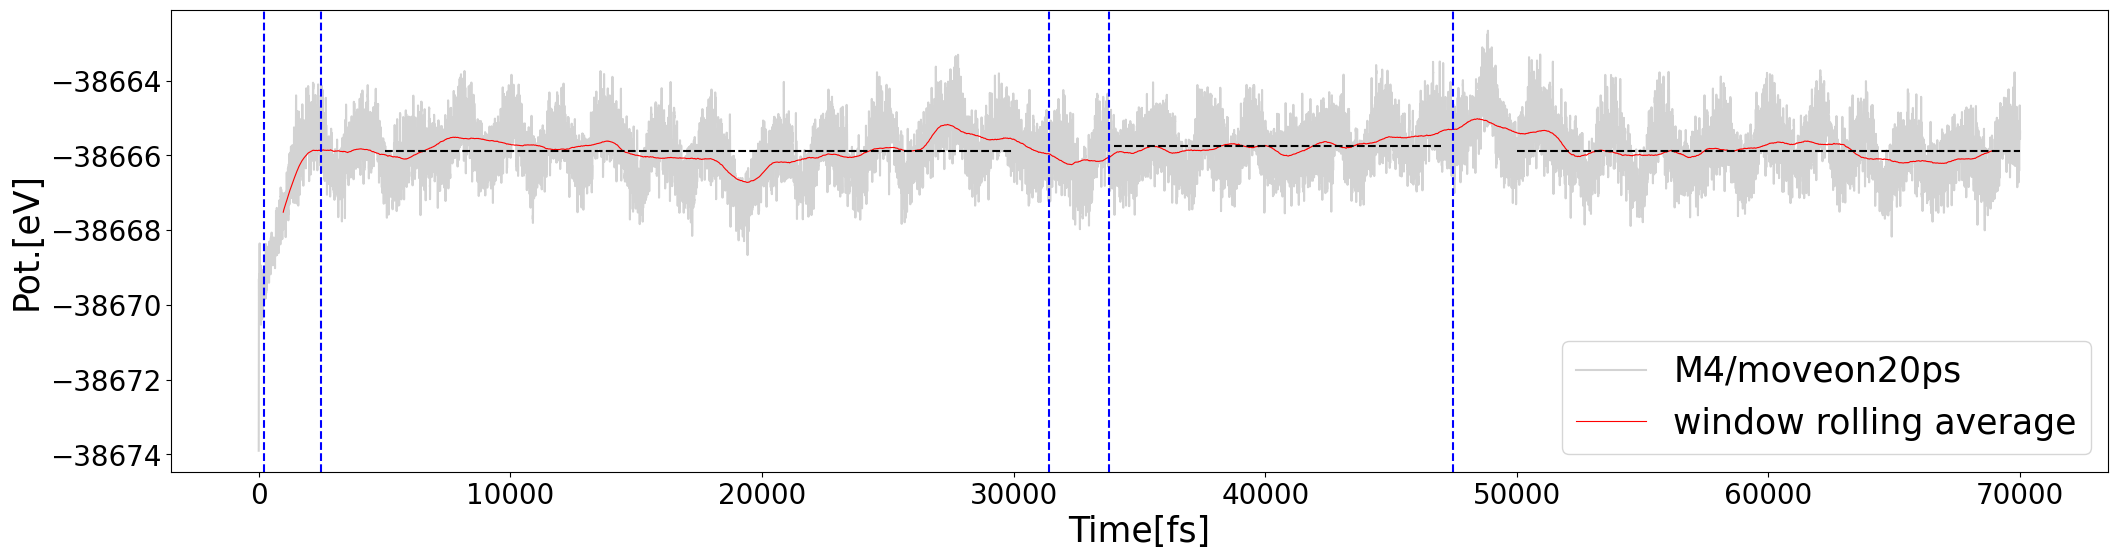

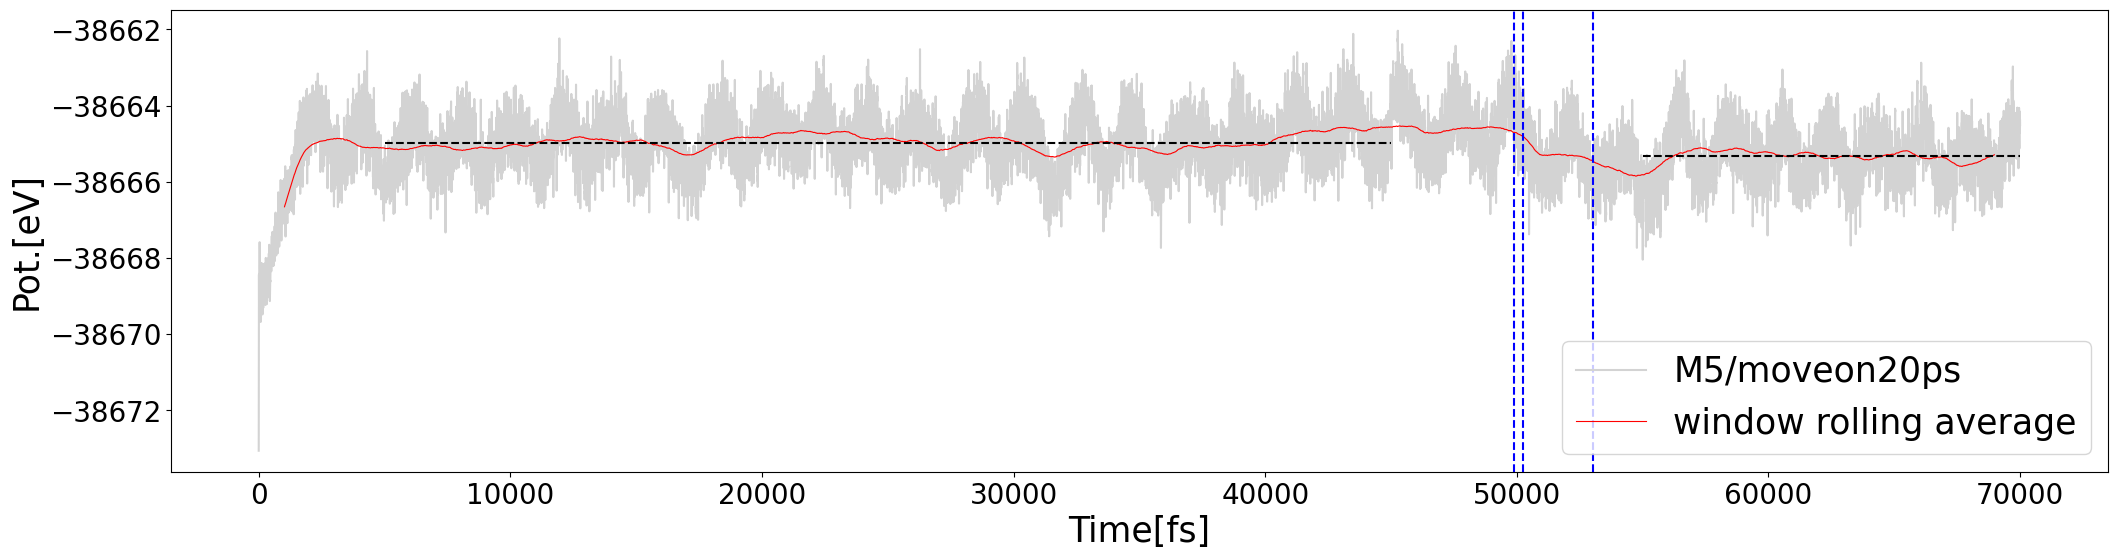

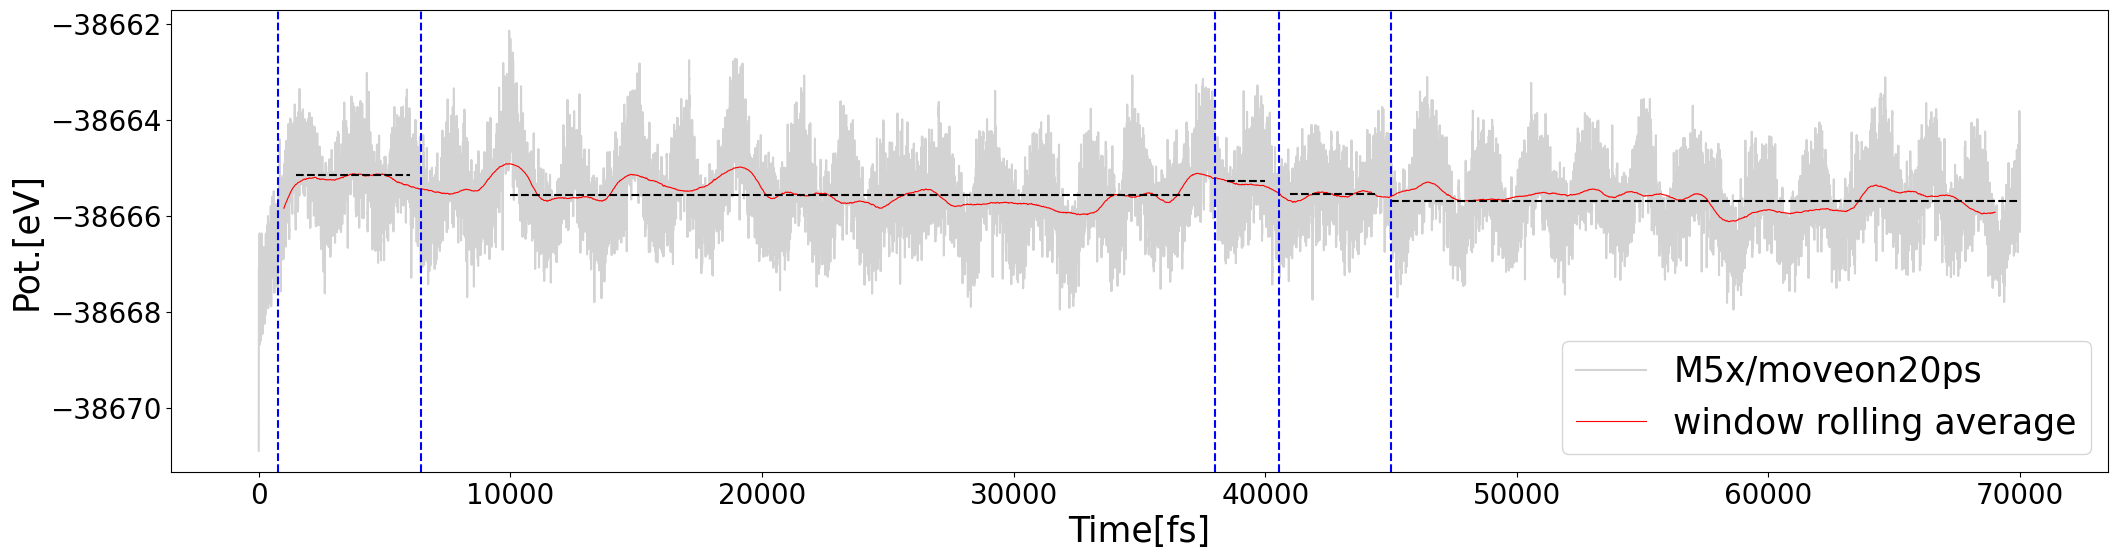

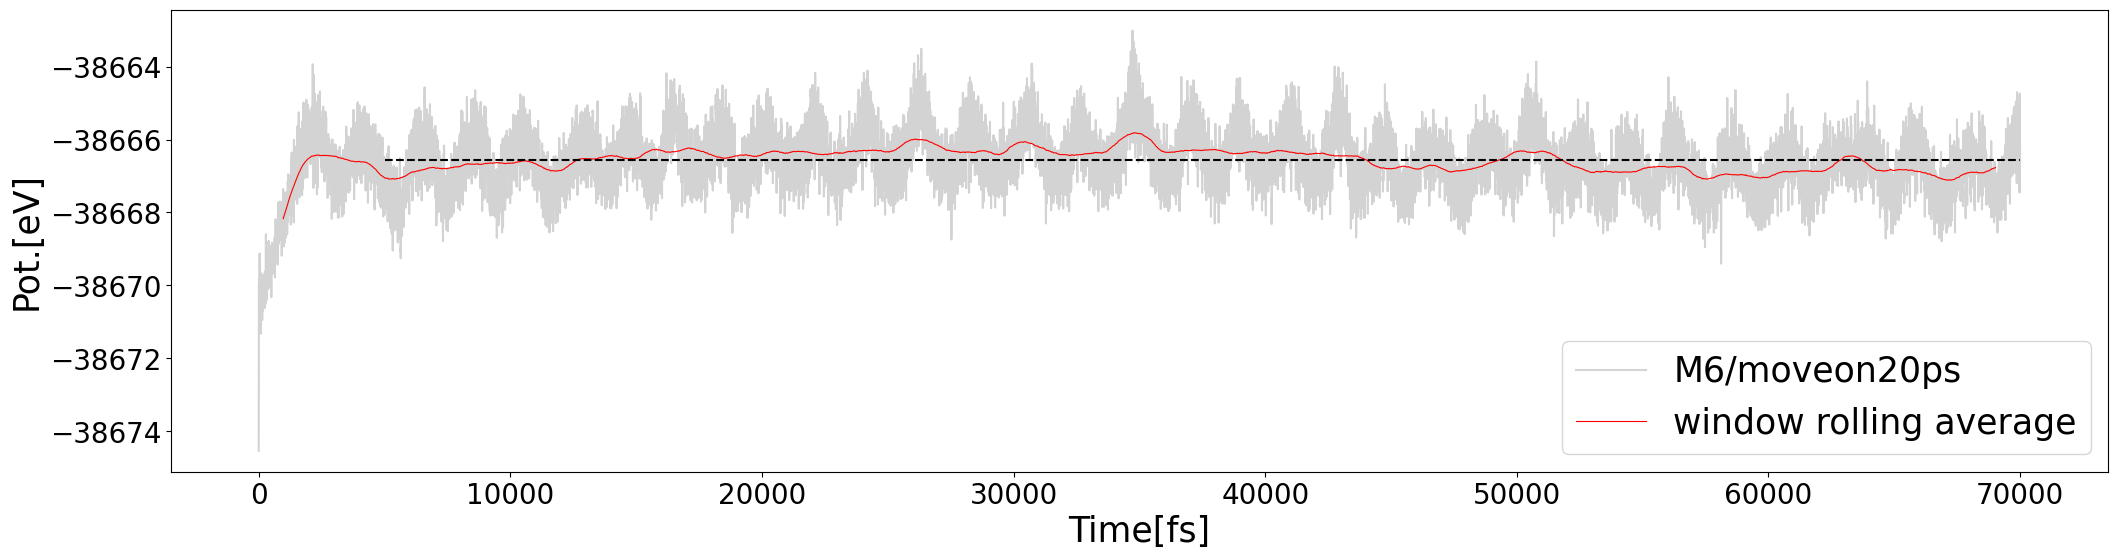

In [74]:
working_paths = ["/media/luping/work/CH4/equilibrium/monomer/M2-H2O-O2/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M3-O2/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M4/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M5/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M5x/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/monomer/M6/moveon20ps"]

hartree2eV = 27.21139664
timestep = 0.5
enfile = "cp2k-1.ener"

windows = [3500,
          3700,
          3900,
          4100,
          4000,
          3900]

areas = {
    0: np.array([[5, 70]]),                               # M2
    1: np.array([[10, 50], [55, 70]]),                    # M3
    2: np.array([[5, 30], [34, 47], 
                 [50, 70]]),                              # M4
    3: np.array([[5, 45], [55, 70]]),                     # M5
    4: np.array([[1.5, 6], [10, 37], [38.5, 40], 
                 [41, 44.5], [45, 70]]),                  # M5x
    5: np.array([[5, 70]])                                # M6
}

hlines = {
    0: np.array([-38665.540]),                            # M2
    1: np.array([-38665.645, -38665.565]),                # M3
    2: np.array([-38665.873, -38665.749, 
                 -38665.869]),                            # M4
    3: np.array([-38664.971, -38665.325]),                # M5
    4: np.array([-38665.150, -38665.571, -38665.278, 
                 -38665.552, -38665.689]),                # M5x
    5: np.array([-38666.563])                             # M6
}

vlines = {
    0: np.array([]),                                      # M2
    1: np.array([5900, 52200]),                           # M3
    2: np.array([190, 2480, 31420, 33800, 47460]),        # M4
    3: np.array([49880, 50250, 53020]),                   # M5
    4: np.array([750, 6430, 38000, 40550, 44980]),        # M5x
    5: np.array([])                                       # M6
}


for i, working_path in enumerate(working_paths):
    os.chdir(working_path)
    
    ener = pd.read_csv(enfile, sep='\s+', header=0, index_col=False,
            names=['Step Nr.', 'Time[fs]', 'Kin.[a.u.]', 'Temp[K]', 'Pot.[a.u.]', 'Cons Qty[a.u.]', 'UsedTime[s]'])
    
    myhead, mytail = os.path.split(working_path)
    mylabel = os.path.join(os.path.basename(myhead), mytail)
    
    _ = plt.figure(figsize=(25, 6))

    pe = ener.loc[:, ["Time[fs]", "Pot.[a.u.]"]]
    roll = pe.rolling(window=windows[i]).mean()
    # window      = Size of the moving window
    # min_periods = Minimum number of observations in window required to have a value, donot matter in this case
    # step        = 1

    plt.plot(ener.loc[:, "Time[fs]"], ener.loc[:, "Pot.[a.u.]"] * hartree2eV, label=mylabel, color="lightgrey")
    plt.plot(roll.loc[:, "Time[fs]"], roll.loc[:, "Pot.[a.u.]"] * hartree2eV, 
             color="red", linewidth=0.8, label="window rolling average")
    
    area = areas[i]
    hline = hlines[i]
    
    for time, E in zip(area, hline):
        start, end = time * 1000
        plt.plot([start, end], [E, E], 'k--')
    
    vline = vlines[i]
    if vline.size != 0:
        for x in vline:
            plt.axvline(x, linestyle ="--", color ='blue')
            
    plt.legend(loc='lower right', fontsize=25)
    plt.xlabel("Time[fs]", fontsize=25)
    plt.ylabel("Pot.[eV]", fontsize=25)
    _ = plt.xticks(fontsize=20)
    _ = plt.yticks(fontsize=20)
    

    plt.savefig('/media/luping/work/CH4/equilibrium/summary/M-{}'.format(i))


## Dimer

In [3]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

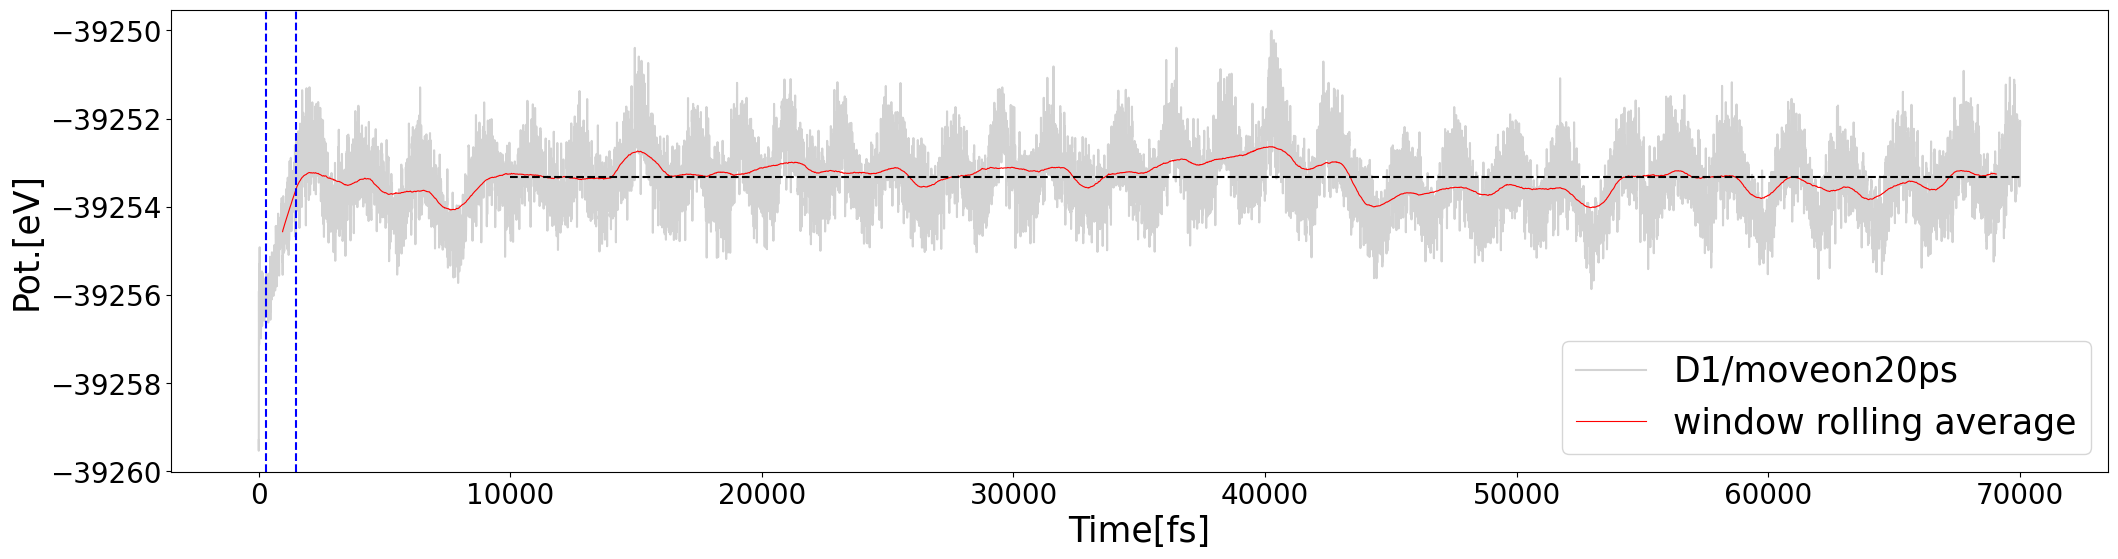

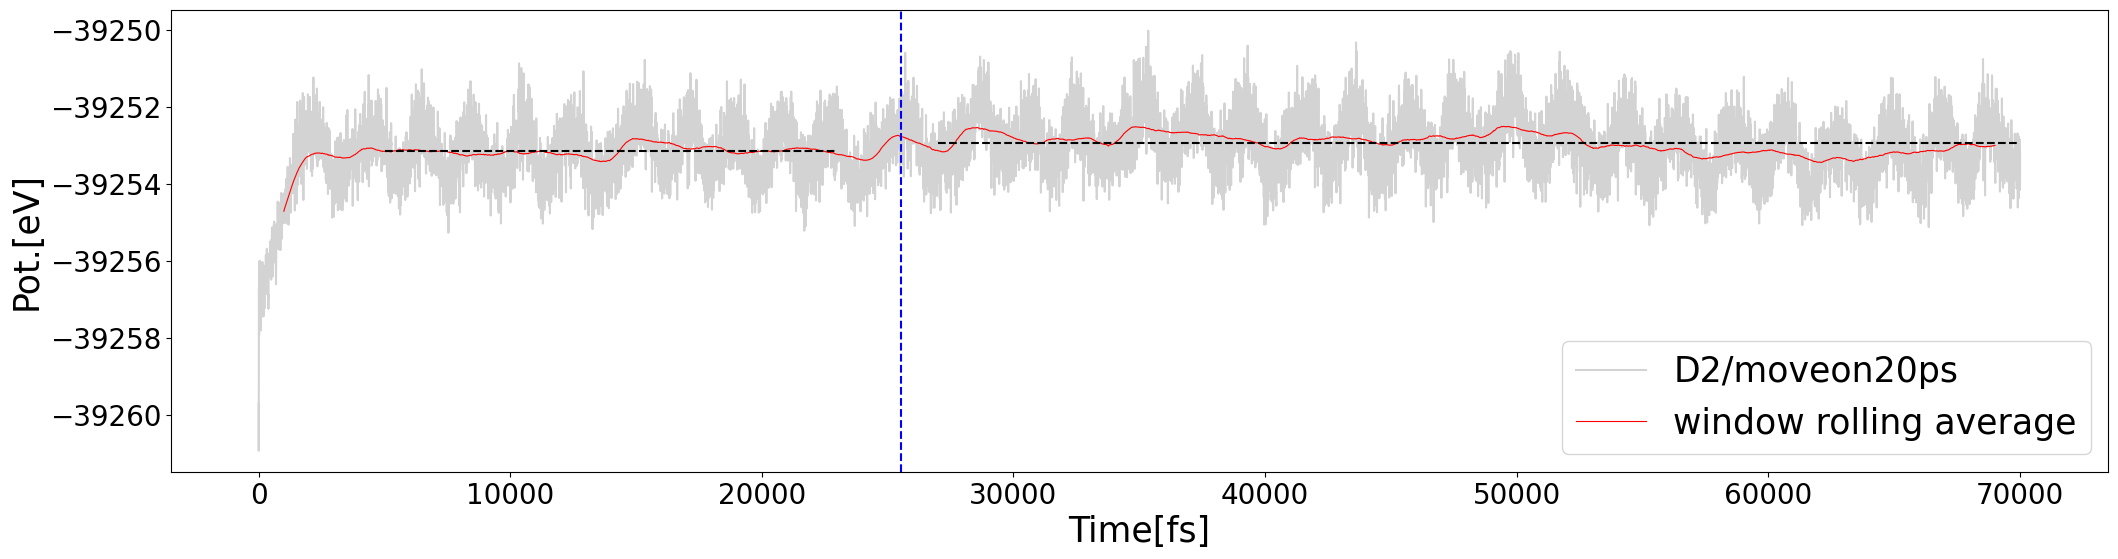

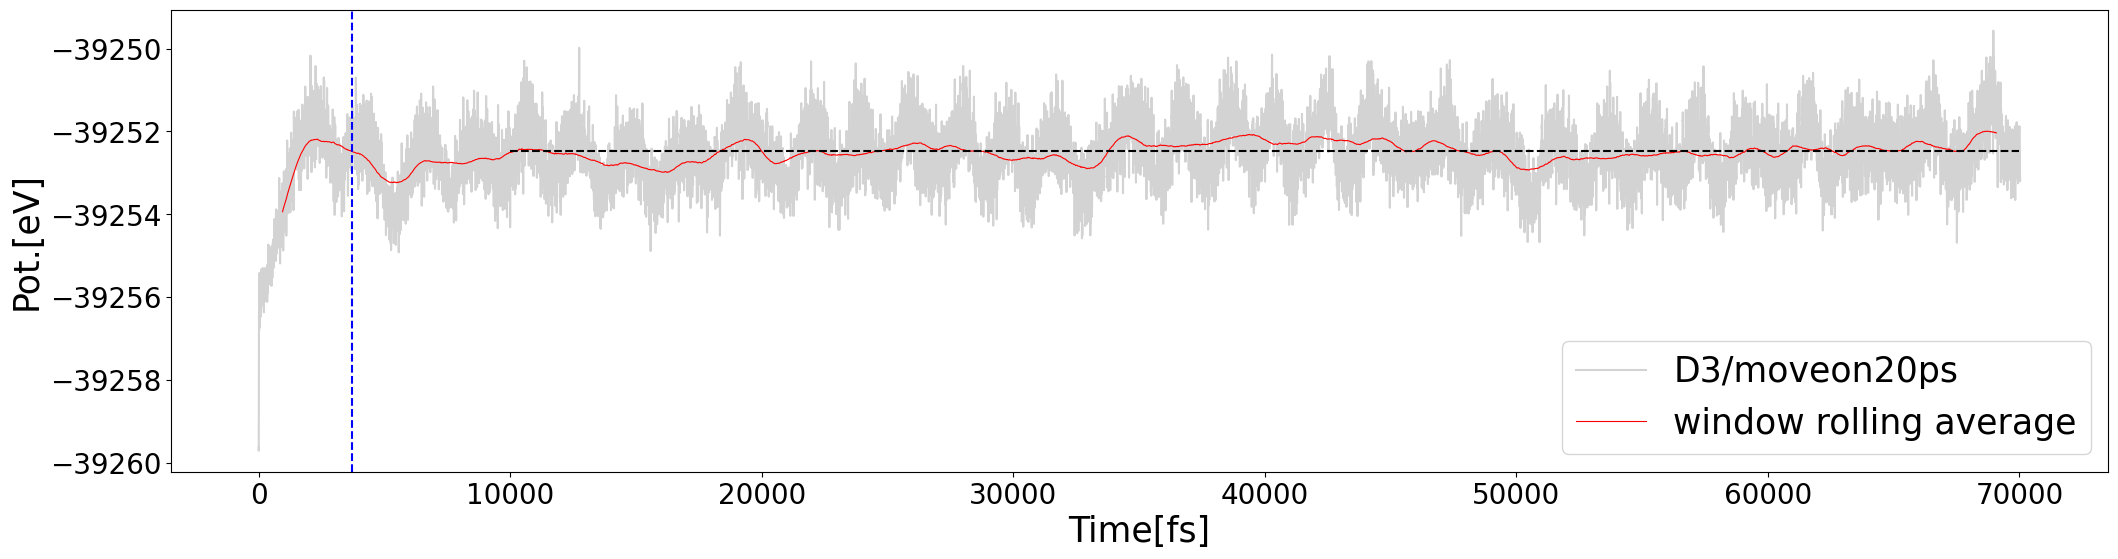

In [48]:
working_paths = ["/media/luping/work/CH4/equilibrium/dimer/D1/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/dimer/D2/moveon20ps",
                 "/media/luping/work/CH4/equilibrium/dimer/D3/moveon20ps"]

hartree2eV = 27.21139664
timestep = 0.5
enfile = "cp2k-1.ener"

windows = [3800,
          4000,
          3800]

areas = {
    0: np.array([[10, 70]]),                   # D1
    1: np.array([[5, 23], [27, 70]]),          # D2
    2: np.array([[10, 70]])                    # D3
}

hlines = {
    0: np.array([-39253.325]),                 # D1
    1: np.array([-39253.149, -39252.945]),     # D2
    2: np.array([-39252.476])                  # D3
}

vlines = {
    0: np.array([300, 1470]),                  # D1
    1: np.array([25550]),                      # D2
    2: np.array([3700])                        # D3
}

for i, working_path in enumerate(working_paths):
    os.chdir(working_path)
    
    ener = pd.read_csv(enfile, sep='\s+', header=0, index_col=False,
            names=['Step Nr.', 'Time[fs]', 'Kin.[a.u.]', 'Temp[K]', 'Pot.[a.u.]', 'Cons Qty[a.u.]', 'UsedTime[s]'])
    
    myhead, mytail = os.path.split(working_path)
    mylabel = os.path.join(os.path.basename(myhead), mytail)
    
    _ = plt.figure(figsize=(25, 6))

    pe = ener.loc[:, ["Time[fs]", "Pot.[a.u.]"]]
    roll = pe.rolling(window=windows[i]).mean()
    # window      = Size of the moving window
    # min_periods = Minimum number of observations in window required to have a value, donot matter in this case
    # step        = 1

    plt.plot(ener.loc[:, "Time[fs]"], ener.loc[:, "Pot.[a.u.]"] * hartree2eV, color="lightgrey", label=mylabel)
    plt.plot(roll.loc[:, "Time[fs]"], roll.loc[:, "Pot.[a.u.]"] * hartree2eV, 
             color="red", linewidth=0.8, label="window rolling average")
    
    area = areas[i]
    hline = hlines[i]
    
    for time, E in zip(area, hline):
        start, end = time * 1000
        plt.plot([start, end], [E, E], 'k--')
    
    vline = vlines[i]
    if vline.size != 0:
        for x in vline:
            plt.axvline(x, linestyle ="--", color ='blue')
    
    plt.legend(loc='lower right', fontsize=25)
    plt.xlabel("Time[fs]", fontsize=25)
    plt.ylabel("Pot.[eV]", fontsize=25)
    _ = plt.xticks(fontsize=20)
    _ = plt.yticks(fontsize=20)
    

    plt.savefig('/media/luping/work/CH4/equilibrium/summary/D-{}'.format(i))


# Determine rolling window average parameters

In [5]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

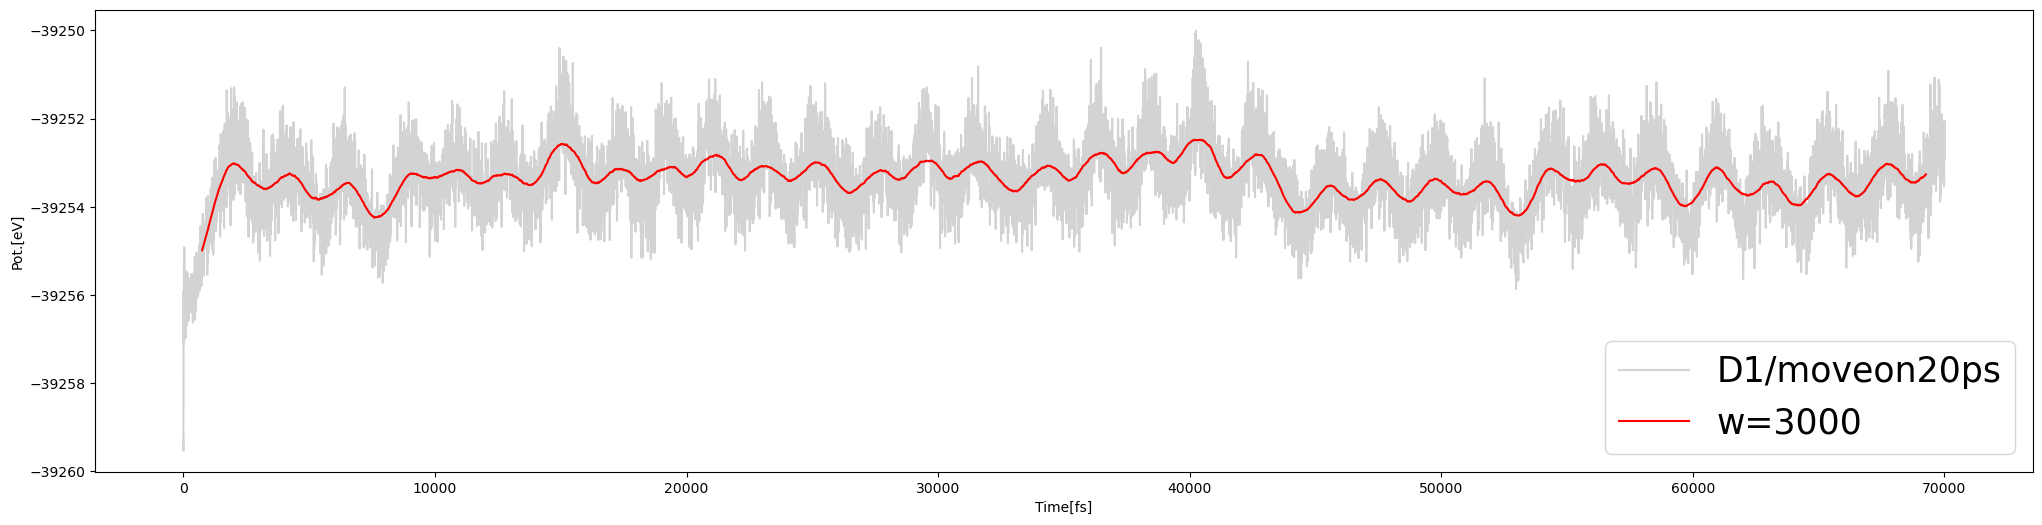

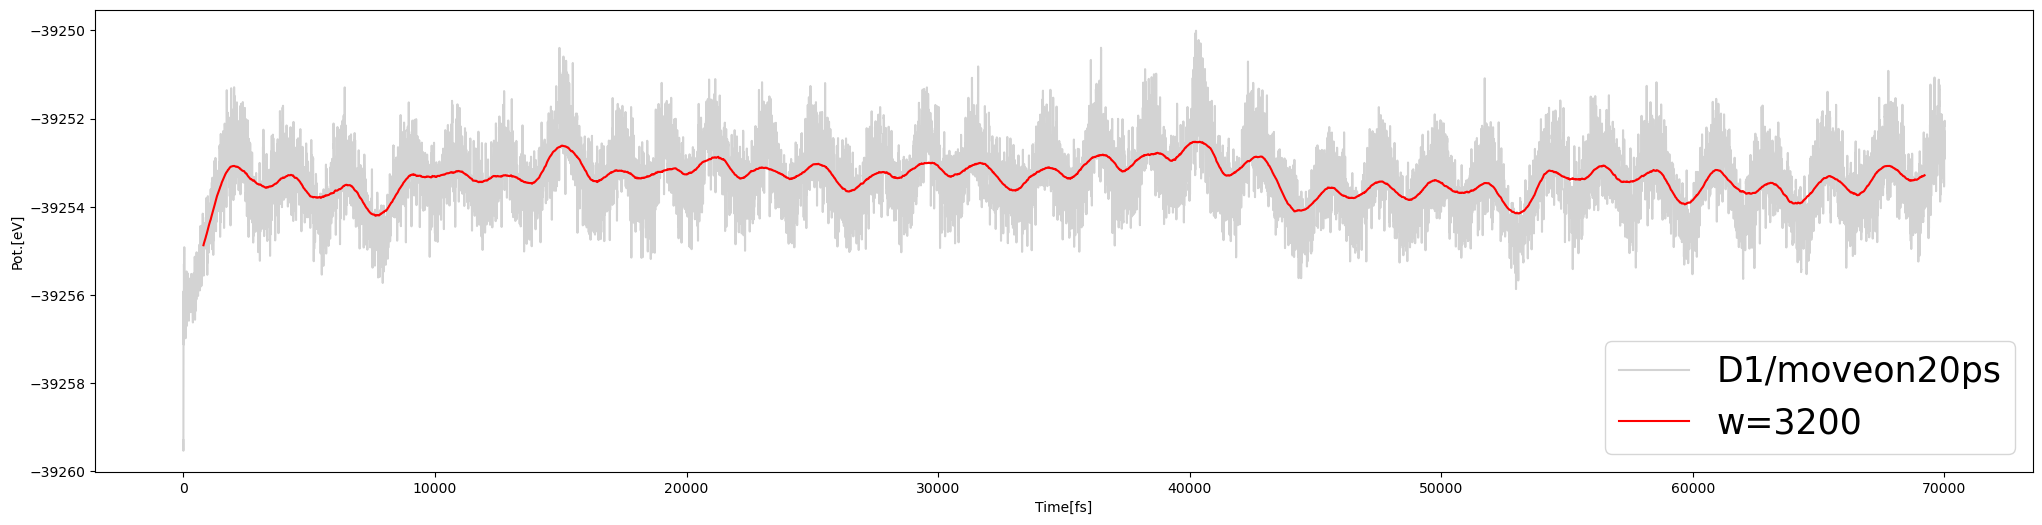

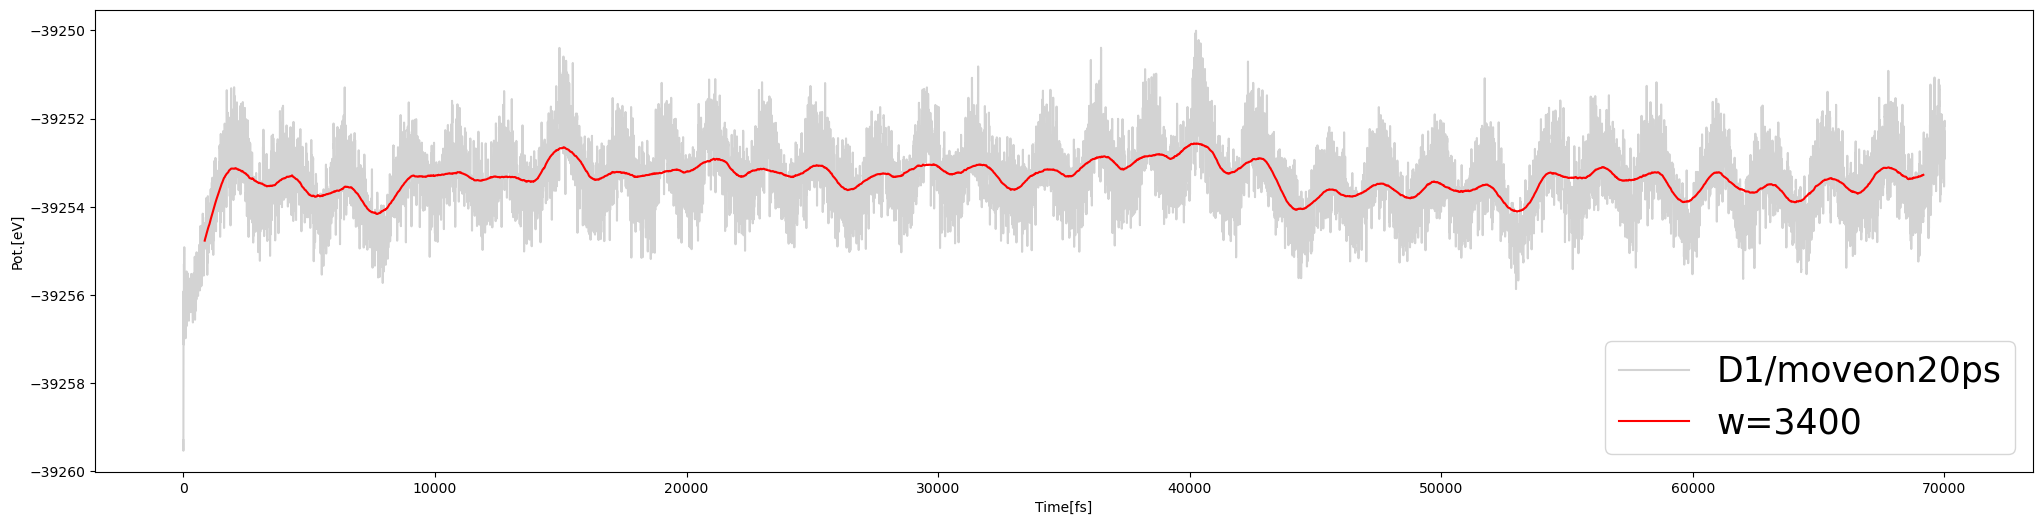

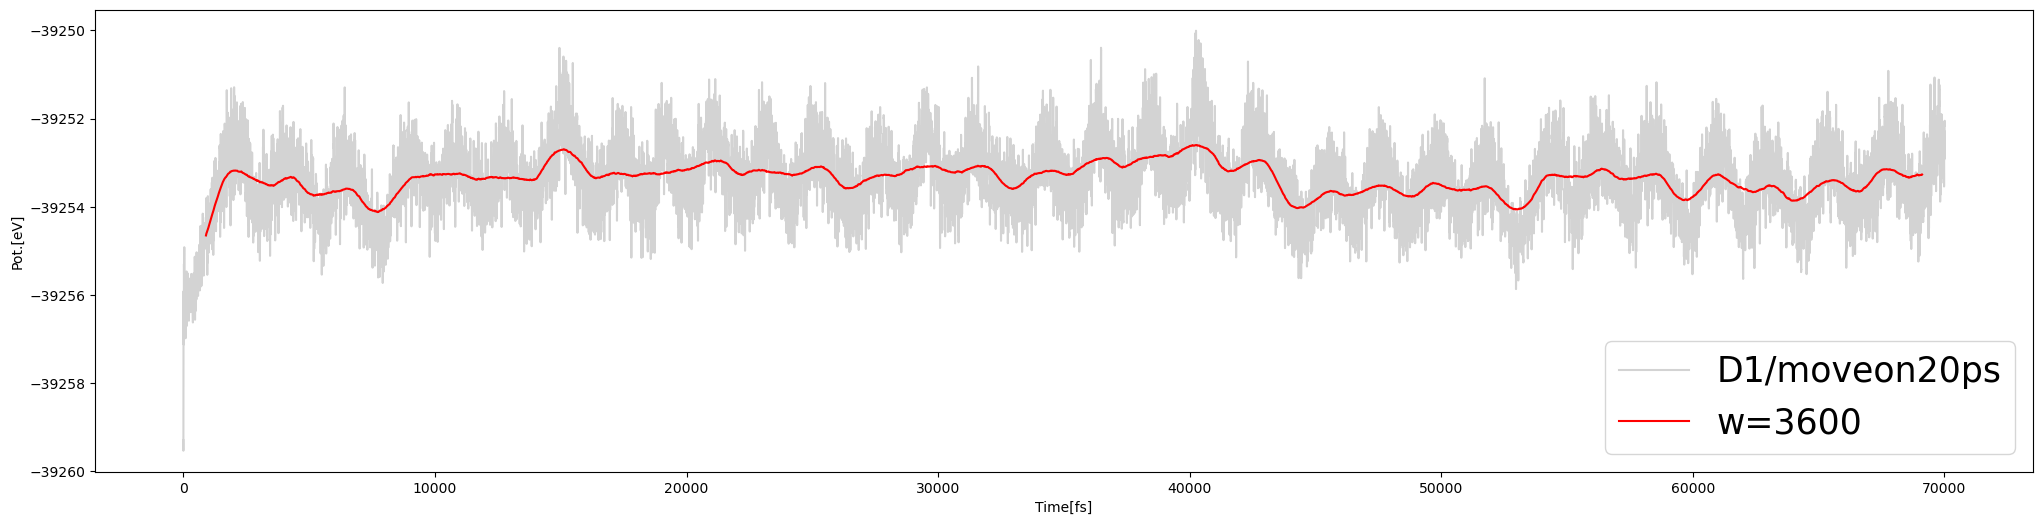

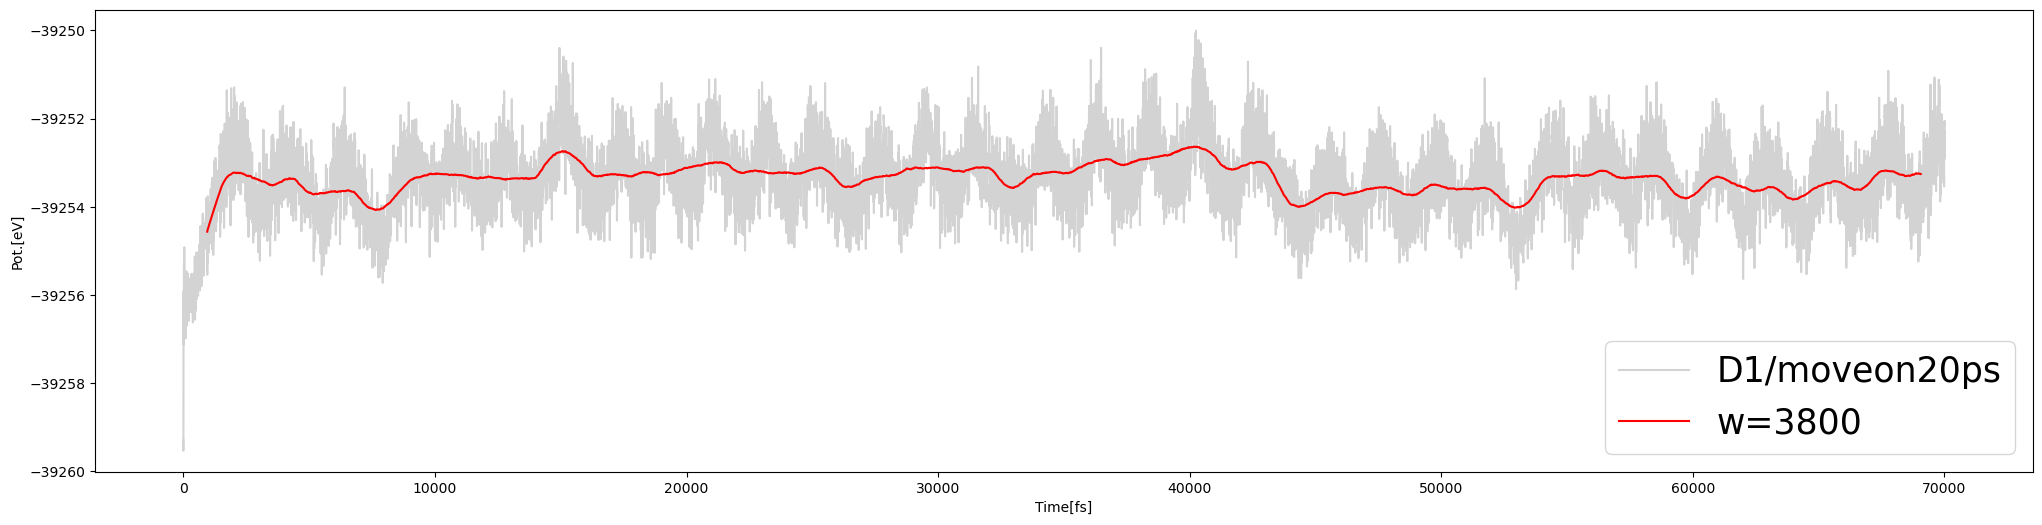

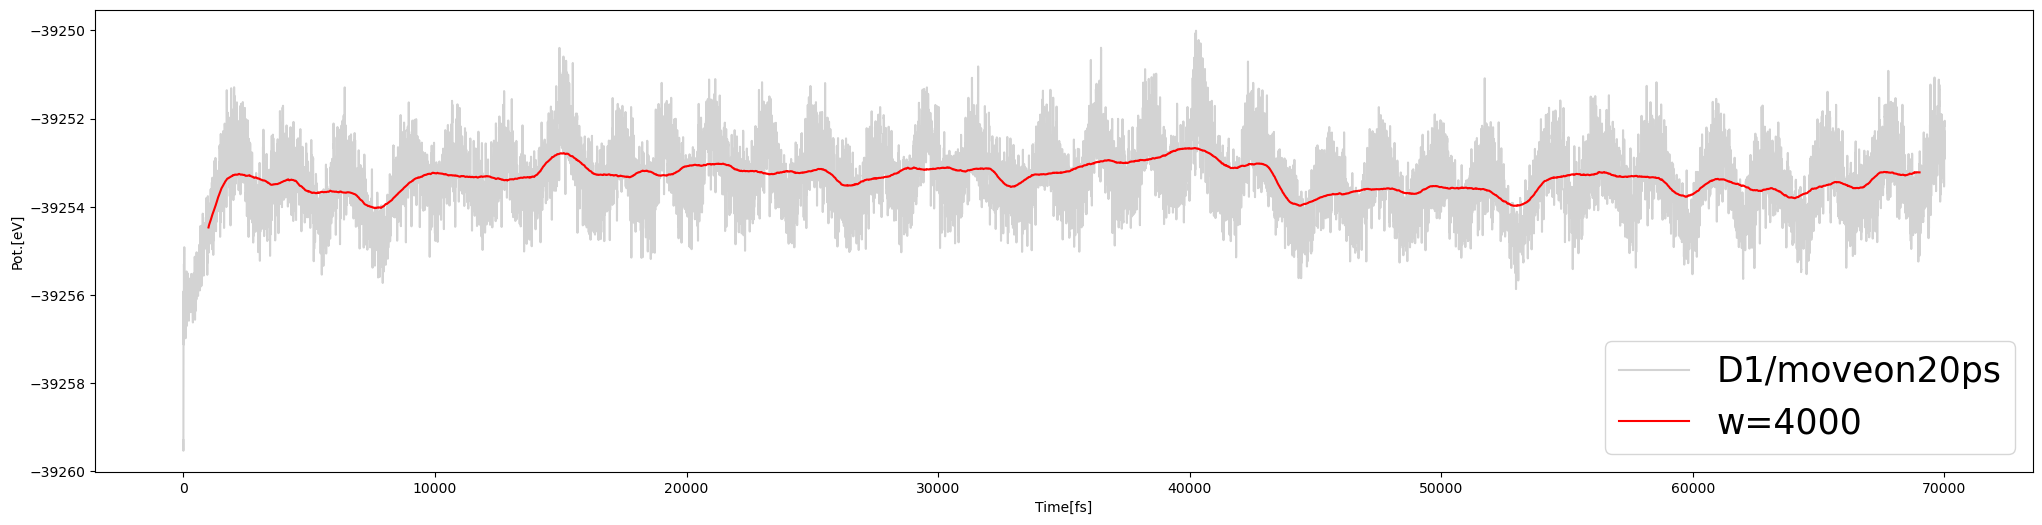

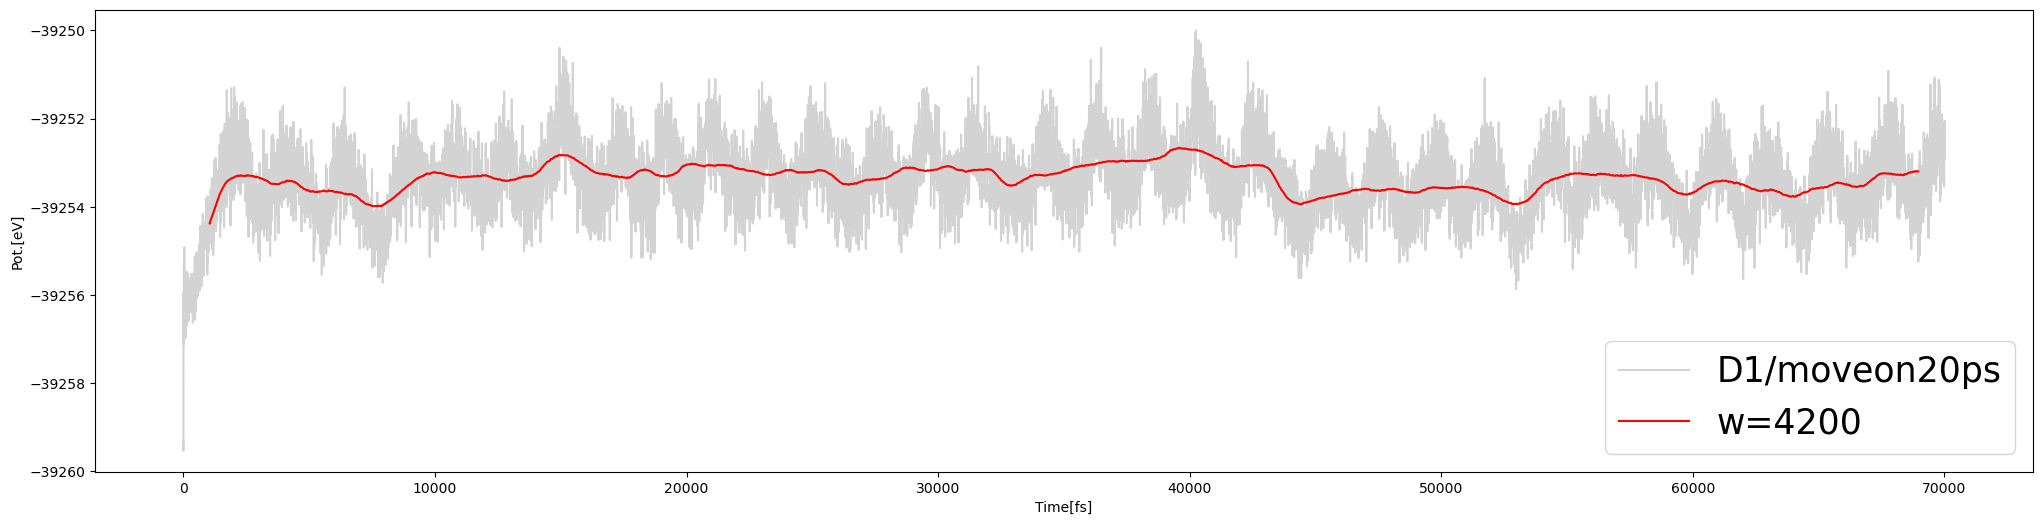

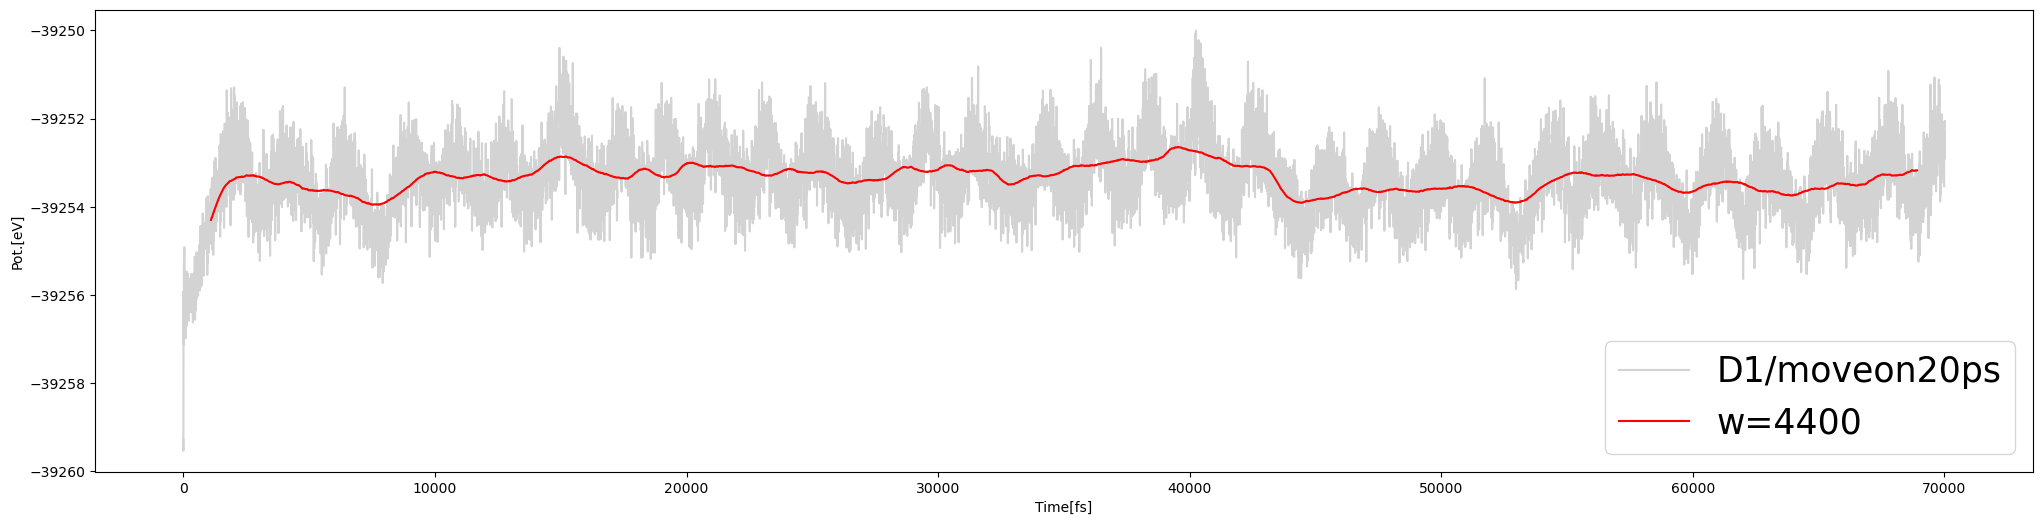

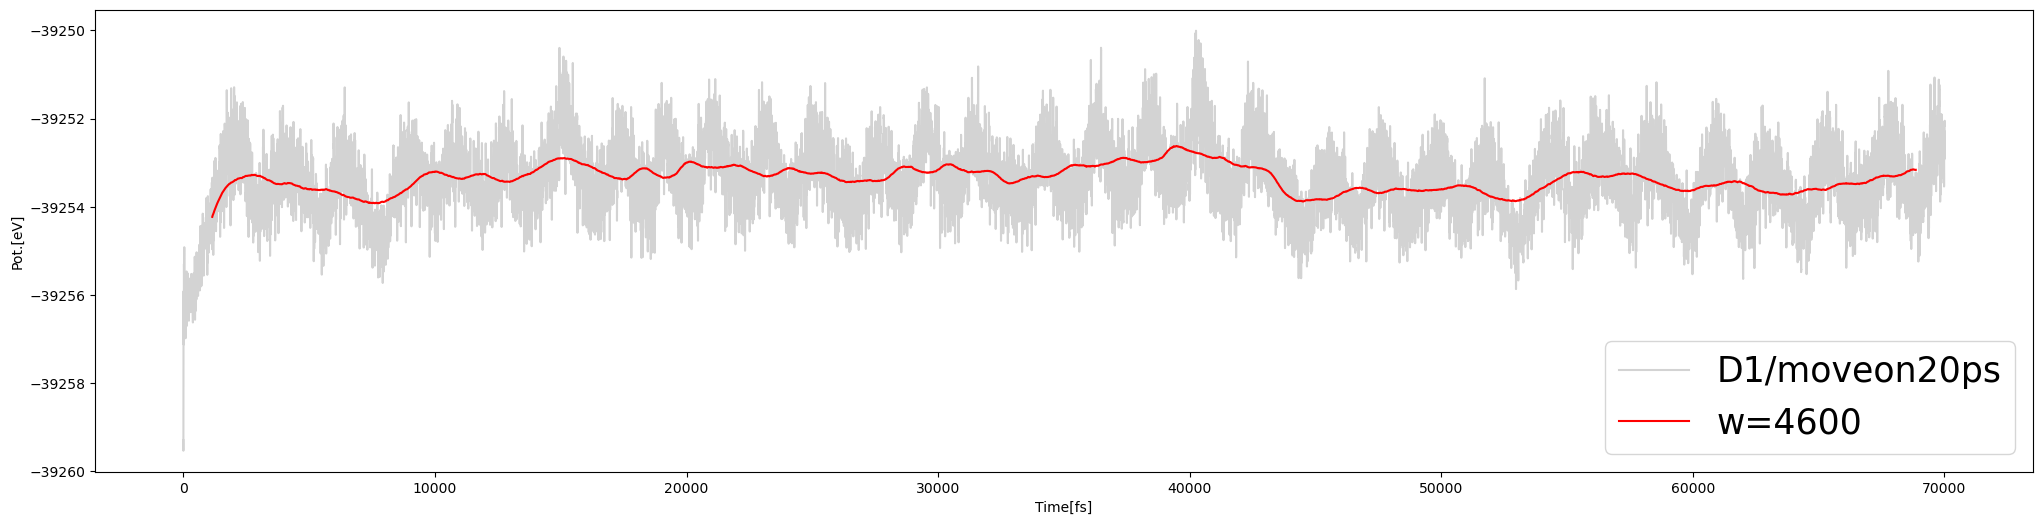

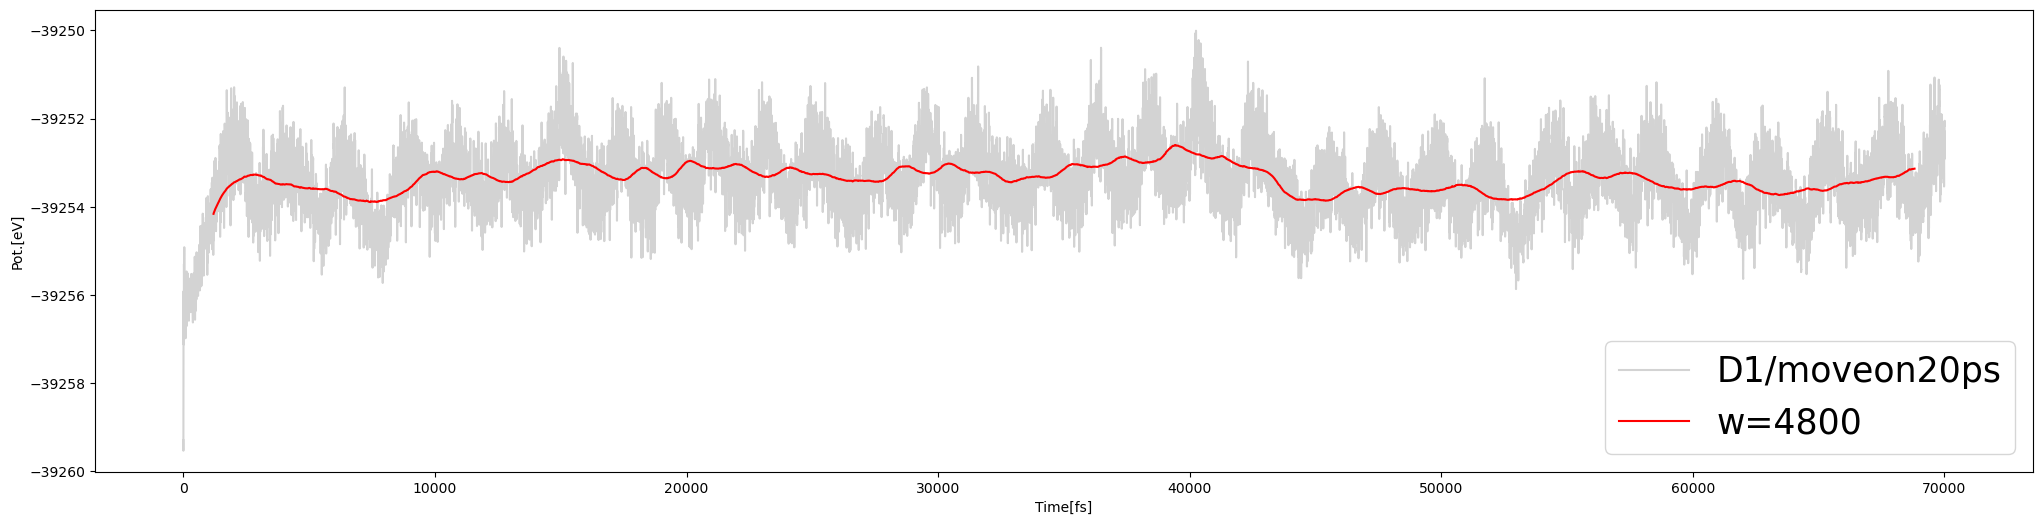

In [6]:
# working_paths = ["/media/luping/work/CH4/equilibrium/monomer/M2-H2O-O2/moveon20ps",
#                  "/media/luping/work/CH4/equilibrium/monomer/M3-O2/moveon20ps",
#                  "/media/luping/work/CH4/equilibrium/monomer/M4/moveon20ps",
#                  "/media/luping/work/CH4/equilibrium/monomer/M5/moveon20ps",
#                  "/media/luping/work/CH4/equilibrium/monomer/M5x/moveon20ps",
#                  "/media/luping/work/CH4/equilibrium/monomer/M6/moveon20ps"]

# working_paths = ["/media/luping/work/CH4/equilibrium/dimer/D1/moveon20ps",
#                  "/media/luping/work/CH4/equilibrium/dimer/D2/moveon20ps",
#                  "/media/luping/work/CH4/equilibrium/dimer/D3/moveon20ps"]

# import itertools

working_path = "/media/luping/work/CH4/equilibrium/dimer/D1/moveon20ps"
os.chdir(working_path)
hartree2eV = 27.21139664
timestep = 0.5
enfile = "cp2k-1.ener"
ener = pd.read_csv(enfile, sep='\s+', header=0, index_col=False,
            names=['Step Nr.', 'Time[fs]', 'Kin.[a.u.]', 'Temp[K]', 'Pot.[a.u.]', 'Cons Qty[a.u.]', 'UsedTime[s]'])

myhead, mytail = os.path.split(working_path)
mylabel = os.path.join(os.path.basename(myhead), mytail)

windows = np.arange(3000, 5000, 200)

for w in windows:

    fi = plt.figure(figsize=(25, 6))

    pe = ener.loc[:, ["Time[fs]", "Pot.[a.u.]"]]
    roll = pe.rolling(window=w).mean()

    plt.plot(ener.loc[:, "Time[fs]"], ener.loc[:, "Pot.[a.u.]"] * hartree2eV, label=mylabel, color="lightgrey")
    plt.plot(roll.loc[:, "Time[fs]"], roll.loc[:, "Pot.[a.u.]"] * hartree2eV, c="red", label="w={}".format(w))
    # plt.xlim([-500, 70000])
    # plt.ylim([-38673, -38662])
    plt.legend(fontsize=25)
    plt.xlabel("Time[fs]")
    plt.ylabel("Pot.[eV]")
    # _ = plt.yticks(fontsize=20)

Text(0, 0.5, 'Pot.[eV]')

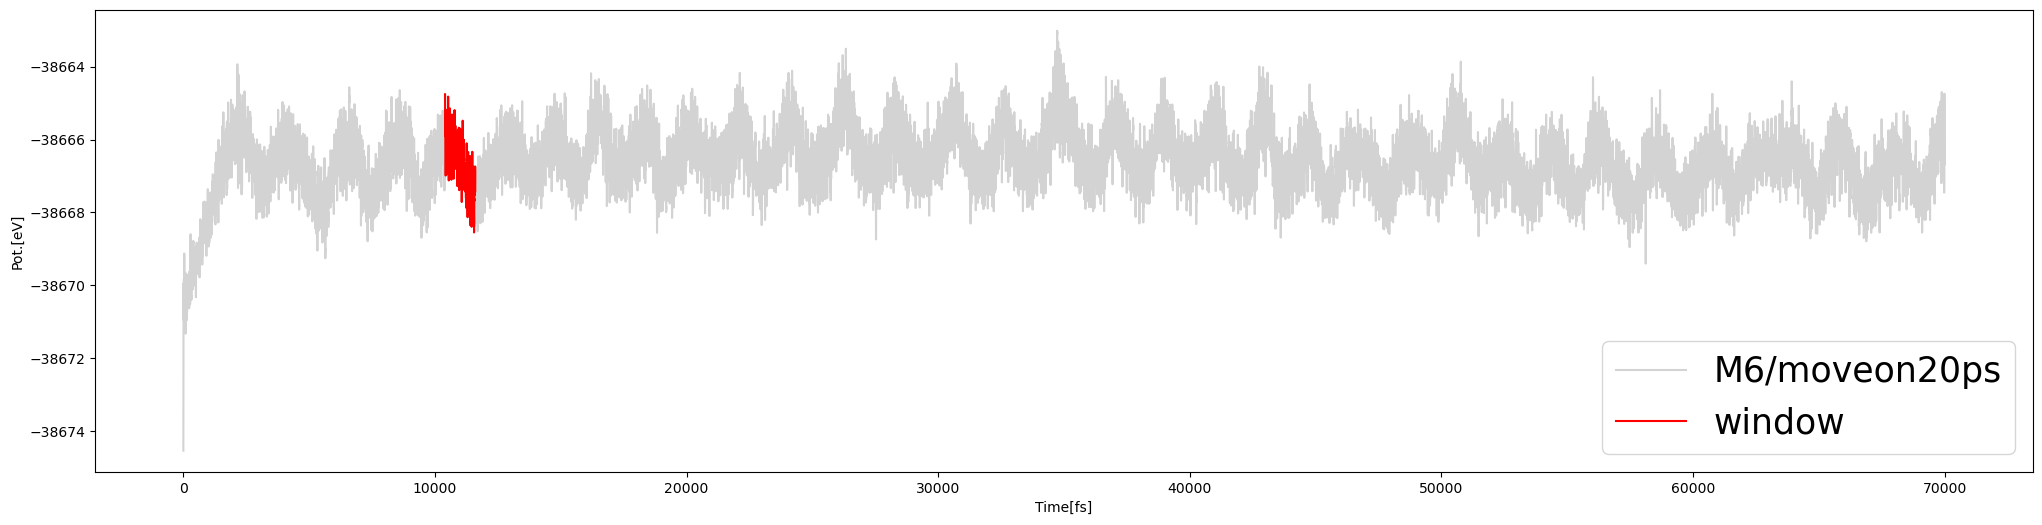

In [15]:
working_path = "/media/luping/work/CH4/equilibrium/monomer/M6/moveon20ps"
os.chdir(working_path)
hartree2eV = 27.21139664
timestep = 0.5
enfile = "cp2k-1.ener"
ener = pd.read_csv(enfile, sep='\s+', header=0, index_col=False,
            names=['Step Nr.', 'Time[fs]', 'Kin.[a.u.]', 'Temp[K]', 'Pot.[a.u.]', 'Cons Qty[a.u.]', 'UsedTime[s]'])

myhead, mytail = os.path.split(working_path)
mylabel = os.path.join(os.path.basename(myhead), mytail)

fi = plt.figure(figsize=(25, 6))

pe = ener.loc[:, ["Time[fs]", "Pot.[a.u.]"]]
# roll = pe.rolling(window=w).mean()

plt.plot(ener.loc[:, "Time[fs]"], ener.loc[:, "Pot.[a.u.]"] * hartree2eV, label=mylabel, color="lightgrey")
plt.plot(ener.loc[20800:23200, "Time[fs]"], ener.loc[20800:23200, "Pot.[a.u.]"] * hartree2eV, label="window", color="red")
# plt.plot(roll.loc[:, "Time[fs]"], roll.loc[:, "Pot.[a.u.]"] * hartree2eV, c="red", label="w={}".format(w))
# plt.xlim([-500, 70000])
# plt.ylim([-38673, -38662])
plt.legend(fontsize=25)
plt.xlabel("Time[fs]")
plt.ylabel("Pot.[eV]")
# _ = plt.yticks(fontsize=20)

In [6]:
ener.shape

(140001, 7)

In [16]:
23200-20800

2400